In [1]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
f = h5py.File("NeutrinoML_Open_WithWire_ts331712.h5", "r")
print("\nprinting top-level keys:")
print(f)
print(f.keys())


printing top-level keys:
<HDF5 file "NeutrinoML_Open_WithWire_ts331712.h5" (mode r)>
<KeysViewHDF5 ['edep_table', 'event_table', 'hit_table', 'opflash_table', 'ophit_table', 'pandoraHit_table', 'pandoraPfp_table', 'pandoraPrimary_table', 'particle_table', 'wire_table']>


In [86]:
def Table2DataFrame(table):
    d1 = { k: table[k][()].flatten() for k in table.keys() if table[k].shape[1]==1}
    d2 = { k+"_"+str(c): table[k][:,c].flatten() for k in table.keys() for c in range(0,table[k].shape[1]) if table[k].shape[1]!=1}
    df = pd.DataFrame( {**d2,**d1} )
    df = df.rename(columns={"event_id_0": "run", "event_id_1": "sub", "event_id_2": "evt"})
    return df

In [87]:
print("\nprinting keys in hit table:")
print(f["hit_table"].keys())
print("\nprinting keys in edep table:")
print(f["edep_table"].keys())
print("\nprinting keys in pandora primary table:")
print(f["pandoraPrimary_table"].keys())
print("\nprinting keys in pandora pfp table:")
print(f["pandoraPfp_table"].keys())
print("\nprinting keys in pandora hit table:")
print(f["pandoraHit_table"].keys())


printing keys in hit table:
<KeysViewHDF5 ['event_id', 'hit_id', 'integral', 'local_plane', 'local_time', 'local_wire', 'rms', 'tpc']>

printing keys in edep table:
<KeysViewHDF5 ['energy', 'energy_fraction', 'event_id', 'g4_id', 'hit_id']>

printing keys in pandora primary table:
<KeysViewHDF5 ['event_id', 'nu_score', 'pdg', 'slice_id', 'vtx', 'vtx_wire_pos', 'vtx_wire_time']>

printing keys in pandora pfp table:
<KeysViewHDF5 ['event_id', 'pdg', 'pfp_id', 'tkrshr_score', 'vtx', 'vtx_wire_pos', 'vtx_wire_time']>

printing keys in pandora hit table:
<KeysViewHDF5 ['event_id', 'hit_id', 'pfp_id', 'slice_id']>


In [88]:
hits = Table2DataFrame(f["hit_table"])
hits

,run,sub,evt,hit_id,integral,local_plane,local_time,local_wire,rms,tpc
0,6506,128,6401,0,57.365513,0,3570.047363,25.0,4.023290,0
1,6506,128,6401,1,83.823898,0,3566.126465,26.0,3.572362,0
2,6506,128,6401,2,115.995720,0,3561.484375,27.0,3.823352,0
3,6506,128,6401,3,282.163055,0,3557.579102,28.0,3.376822,0
4,6506,128,6401,4,152.136459,0,3555.646729,29.0,3.524922,0
...,...,...,...,...,...,...,...,...,...,...
1711587,6506,137,6898,14488,213.966019,2,6213.527344,3430.0,3.043736,0
1711588,6506,137,6898,14489,138.097916,2,486.424438,3431.0,4.086672,0
1711589,6506,137,6898,14490,78.229744,2,5725.056152,3431.0,3.762090,0
1711590,6506,137,6898,14491,135.898941,2,489.358307,3432.0,4.502100,0


In [89]:
pandhits = Table2DataFrame(f["pandoraHit_table"])
pandhits

,run,sub,evt,hit_id,pfp_id,slice_id
0,6506,128,6401,0,-1,17
1,6506,128,6401,1,-1,17
2,6506,128,6401,2,-1,17
3,6506,128,6401,3,-1,17
4,6506,128,6401,4,-1,17
...,...,...,...,...,...,...
1711587,6506,137,6898,14488,-1,16
1711588,6506,137,6898,14489,-1,10
1711589,6506,137,6898,14490,-1,16
1711590,6506,137,6898,14491,-1,10


In [90]:
hits = hits.merge(pandhits, on=["run","sub","evt","hit_id"])
hits

,run,sub,evt,hit_id,integral,local_plane,local_time,local_wire,rms,tpc,pfp_id,slice_id
0,6506,128,6401,0,57.365513,0,3570.047363,25.0,4.023290,0,-1,17
1,6506,128,6401,1,83.823898,0,3566.126465,26.0,3.572362,0,-1,17
2,6506,128,6401,2,115.995720,0,3561.484375,27.0,3.823352,0,-1,17
3,6506,128,6401,3,282.163055,0,3557.579102,28.0,3.376822,0,-1,17
4,6506,128,6401,4,152.136459,0,3555.646729,29.0,3.524922,0,-1,17
...,...,...,...,...,...,...,...,...,...,...,...,...
1711587,6506,137,6898,14488,213.966019,2,6213.527344,3430.0,3.043736,0,-1,16
1711588,6506,137,6898,14489,138.097916,2,486.424438,3431.0,4.086672,0,-1,10
1711589,6506,137,6898,14490,78.229744,2,5725.056152,3431.0,3.762090,0,-1,16
1711590,6506,137,6898,14491,135.898941,2,489.358307,3432.0,4.502100,0,-1,10


In [91]:
edeps = Table2DataFrame(f["edep_table"])
edeps

,run,sub,evt,energy,energy_fraction,g4_id,hit_id
0,6506,128,6401,1.946514,0.999928,3,211
1,6506,128,6401,0.000141,0.000072,6,211
2,6506,128,6401,0.170546,0.031133,98,215
3,6506,128,6401,0.027469,0.005014,4,215
4,6506,128,6401,0.397784,0.072614,3,215
...,...,...,...,...,...,...,...
553444,6506,137,6898,0.792252,1.000000,2614,13093
553445,6506,137,6898,0.794417,0.944855,2615,13332
553446,6506,137,6898,0.046365,0.055145,2625,13332
553447,6506,137,6898,0.694303,0.779218,2615,13333


In [92]:
edeps = edeps.sort_values(by=['energy_fraction'], ascending=False, kind='mergesort').drop_duplicates(["run","sub","evt","hit_id"])
edeps

,run,sub,evt,energy,energy_fraction,g4_id,hit_id
26,6506,128,6401,5.399584,1.000000,2,223
27,6506,128,6401,0.001778,1.000000,2,224
28,6506,128,6401,0.011668,1.000000,685,230
33,6506,128,6401,5.728998,1.000000,2,234
38,6506,128,6401,0.512232,1.000000,1,241
...,...,...,...,...,...,...,...
161211,6506,131,6569,1.515597,0.095550,3506,6063
161128,6506,131,6569,1.379928,0.094543,918,6053
274558,6506,133,6676,1.980549,0.094249,1254,10710
167448,6506,131,6569,0.728176,0.090718,3422,18382


In [93]:
hits = hits.merge(edeps, on=["run","sub","evt","hit_id"], how="left")
hits['g4_id'] = hits['g4_id'].fillna(-1)
hits = hits.fillna(0)
hits

,run,sub,evt,hit_id,integral,local_plane,local_time,local_wire,rms,tpc,pfp_id,slice_id,energy,energy_fraction,g4_id
0,6506,128,6401,0,57.365513,0,3570.047363,25.0,4.023290,0,-1,17,0.0,0.0,-1.0
1,6506,128,6401,1,83.823898,0,3566.126465,26.0,3.572362,0,-1,17,0.0,0.0,-1.0
2,6506,128,6401,2,115.995720,0,3561.484375,27.0,3.823352,0,-1,17,0.0,0.0,-1.0
3,6506,128,6401,3,282.163055,0,3557.579102,28.0,3.376822,0,-1,17,0.0,0.0,-1.0
4,6506,128,6401,4,152.136459,0,3555.646729,29.0,3.524922,0,-1,17,0.0,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1711587,6506,137,6898,14488,213.966019,2,6213.527344,3430.0,3.043736,0,-1,16,0.0,0.0,-1.0
1711588,6506,137,6898,14489,138.097916,2,486.424438,3431.0,4.086672,0,-1,10,0.0,0.0,-1.0
1711589,6506,137,6898,14490,78.229744,2,5725.056152,3431.0,3.762090,0,-1,16,0.0,0.0,-1.0
1711590,6506,137,6898,14491,135.898941,2,489.358307,3432.0,4.502100,0,-1,10,0.0,0.0,-1.0


In [94]:
hits[hits['g4_id']>=0]

,run,sub,evt,hit_id,integral,local_plane,local_time,local_wire,rms,tpc,pfp_id,slice_id,energy,energy_fraction,g4_id
211,6506,128,6401,211,599.146484,0,4164.306641,521.0,7.867654,0,34,9,1.946514,0.999928,3.0
215,6506,128,6401,215,728.597351,0,4190.842285,525.0,8.829429,0,34,9,4.198927,0.766501,2.0
218,6506,128,6401,218,84.307930,0,4183.280273,526.0,5.317843,0,34,9,0.499420,0.482087,1.0
219,6506,128,6401,219,561.260254,0,4203.370605,526.0,9.377630,0,20,9,5.449611,0.950726,2.0
222,6506,128,6401,222,141.688110,0,4180.016113,527.0,4.155682,0,34,9,0.737012,0.552984,696.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710190,6506,137,6898,13091,63.709141,2,3217.333740,1828.0,3.746203,0,-1,9,0.537683,1.000000,2614.0
1710191,6506,137,6898,13092,83.293877,2,3217.043213,1829.0,3.939604,0,-1,9,0.690013,1.000000,2614.0
1710192,6506,137,6898,13093,80.433792,2,3215.952637,1830.0,4.289770,0,-1,9,0.792252,1.000000,2614.0
1710431,6506,137,6898,13332,101.307076,2,3288.427734,2030.0,4.135967,0,-1,9,0.794417,0.944855,2615.0


In [95]:
slicehits = hits.groupby(["run","sub","evt","slice_id"]).size().reset_index().rename(columns={0:'tothits'})
slicehits

,run,sub,evt,slice_id,tothits
0,6506,128,6401,0,2116
1,6506,128,6401,1,2091
2,6506,128,6401,2,1734
3,6506,128,6401,3,1384
4,6506,128,6401,4,1289
...,...,...,...,...,...
2250,6506,137,6898,15,399
2251,6506,137,6898,16,128
2252,6506,137,6898,17,58
2253,6506,137,6898,18,10


In [96]:
slnuhits = hits[hits['g4_id']>=0].groupby(["run","sub","evt","slice_id"]).size().reset_index().rename(columns={0:'nuhits'})
slnuhits

,run,sub,evt,slice_id,nuhits
0,6506,128,6401,8,12
1,6506,128,6401,9,1151
2,6506,128,6401,12,3
3,6506,128,6406,1,1934
4,6506,128,6406,5,44
...,...,...,...,...,...
482,6506,137,6898,3,2
483,6506,137,6898,8,3
484,6506,137,6898,9,45
485,6506,137,6898,12,16


In [97]:
slicehits = slicehits.merge(slnuhits, on=["run","sub","evt","slice_id"], how='left')
slicehits['nuhits'] = slicehits['nuhits'].fillna(0)
slicehits

,run,sub,evt,slice_id,tothits,nuhits
0,6506,128,6401,0,2116,0.0
1,6506,128,6401,1,2091,0.0
2,6506,128,6401,2,1734,0.0
3,6506,128,6401,3,1384,0.0
4,6506,128,6401,4,1289,0.0
...,...,...,...,...,...,...
2250,6506,137,6898,15,399,11.0
2251,6506,137,6898,16,128,0.0
2252,6506,137,6898,17,58,0.0
2253,6506,137,6898,18,10,0.0


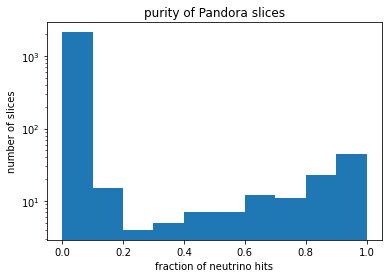

In [104]:
plt.hist(slicehits['nuhits']/slicehits['tothits'],bins=10,range=(0,1))
plt.yscale('log')
plt.xlabel('fraction of neutrino hits')
plt.ylabel('number of slices')
plt.title('purity of Pandora slices')
plt.show()

In [100]:
primary = Table2DataFrame(f["pandoraPrimary_table"])
primary

,run,sub,evt,vtx_0,vtx_1,vtx_2,vtx_wire_pos_0,vtx_wire_pos_1,vtx_wire_pos_2,nu_score,pdg,slice_id,vtx_wire_time
0,6506,128,6401,127.105225,6.389621,739.479675,1552,1583,2464,-999.000000,13,0,3115.362305
1,6506,128,6401,181.370377,116.934860,914.031311,1524,2193,3046,-999.000000,13,1,4103.861816
2,6506,128,6401,43.727150,104.145065,380.948029,672,1268,1269,-999.000000,13,2,1596.538452
3,6506,128,6401,189.539062,112.585831,979.796997,1646,2291,3265,-999.000000,13,3,4252.663574
4,6506,128,6401,153.981491,108.094666,313.412048,548,1167,1044,-999.000000,13,4,3604.943115
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3148,6506,137,6898,109.933342,117.069511,1002.224731,1671,2341,3340,0.012223,13,16,2802.557373
3149,6506,137,6898,-27.663042,-107.418999,978.846558,2280,1654,3262,-999.000000,13,19,296.087097
3150,6506,137,6898,41.223782,-104.337646,690.197266,1790,1182,2300,0.022896,13,15,1550.936768
3151,6506,137,6898,122.900505,90.453445,929.309875,1626,2142,3097,0.012223,13,16,3038.768555


In [102]:
#todo: merge primaries with slices, compute purity only for the neutrino slice!
slices = primary.drop_duplicates(["run","sub","evt","slice_id"])
slices

,run,sub,evt,vtx_0,vtx_1,vtx_2,vtx_wire_pos_0,vtx_wire_pos_1,vtx_wire_pos_2,nu_score,pdg,slice_id,vtx_wire_time
0,6506,128,6401,127.105225,6.389621,739.479675,1552,1583,2464,-999.000000,13,0,3115.362305
1,6506,128,6401,181.370377,116.934860,914.031311,1524,2193,3046,-999.000000,13,1,4103.861816
2,6506,128,6401,43.727150,104.145065,380.948029,672,1268,1269,-999.000000,13,2,1596.538452
3,6506,128,6401,189.539062,112.585831,979.796997,1646,2291,3265,-999.000000,13,3,4252.663574
4,6506,128,6401,153.981491,108.094666,313.412048,548,1167,1044,-999.000000,13,4,3604.943115
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3143,6506,137,6898,102.969055,104.688797,1010.789062,1721,2319,3368,0.012223,13,16,2675.695312
3144,6506,137,6898,288.857758,-37.711639,178.722809,745,522,595,-999.000000,13,17,6061.863281
3145,6506,137,6898,-30.160688,61.575092,116.745621,355,705,388,-999.000000,13,18,250.589706
3149,6506,137,6898,-27.663042,-107.418999,978.846558,2280,1654,3262,-999.000000,13,19,296.087097


In [103]:
slices = slices.merge(slicehits, on=["run","sub","evt","slice_id"], how='left')
slices

,run,sub,evt,vtx_0,vtx_1,vtx_2,vtx_wire_pos_0,vtx_wire_pos_1,vtx_wire_pos_2,nu_score,pdg,slice_id,vtx_wire_time,tothits,nuhits
0,6506,128,6401,127.105225,6.389621,739.479675,1552,1583,2464,-999.000000,13,0,3115.362305,2116,0.0
1,6506,128,6401,181.370377,116.934860,914.031311,1524,2193,3046,-999.000000,13,1,4103.861816,2091,0.0
2,6506,128,6401,43.727150,104.145065,380.948029,672,1268,1269,-999.000000,13,2,1596.538452,1734,0.0
3,6506,128,6401,189.539062,112.585831,979.796997,1646,2291,3265,-999.000000,13,3,4252.663574,1384,0.0
4,6506,128,6401,153.981491,108.094666,313.412048,548,1167,1044,-999.000000,13,4,3604.943115,1289,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2247,6506,137,6898,102.969055,104.688797,1010.789062,1721,2319,3368,0.012223,13,16,2675.695312,128,0.0
2248,6506,137,6898,288.857758,-37.711639,178.722809,745,522,595,-999.000000,13,17,6061.863281,58,0.0
2249,6506,137,6898,-30.160688,61.575092,116.745621,355,705,388,-999.000000,13,18,250.589706,10,0.0
2250,6506,137,6898,-27.663042,-107.418999,978.846558,2280,1654,3262,-999.000000,13,19,296.087097,6,0.0


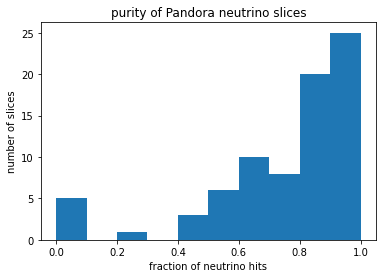

In [106]:
nuslices = slices[(slices['pdg']==12)|(slices['pdg']==14)]
plt.hist(nuslices['nuhits']/nuslices['tothits'],bins=10,range=(0,1))
#plt.yscale('log')
plt.xlabel('fraction of neutrino hits')
plt.ylabel('number of slices')
plt.title('purity of Pandora neutrino slices')
plt.show()

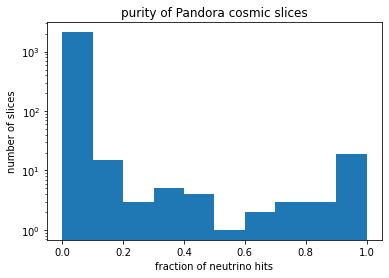

In [109]:
cosmslices = slices[(slices['pdg']!=12)&(slices['pdg']!=14)]
plt.hist(cosmslices['nuhits']/cosmslices['tothits'],bins=10,range=(0,1))
plt.yscale('log')
plt.xlabel('fraction of neutrino hits')
plt.ylabel('number of slices')
plt.title('purity of Pandora cosmic slices')
plt.show()